In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%matplotlib inline

sns.set_style('whitegrid')
plt.rc('figure', figsize=(16.0, 8.0))

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
import statsmodels.api as sm

In [7]:
import math

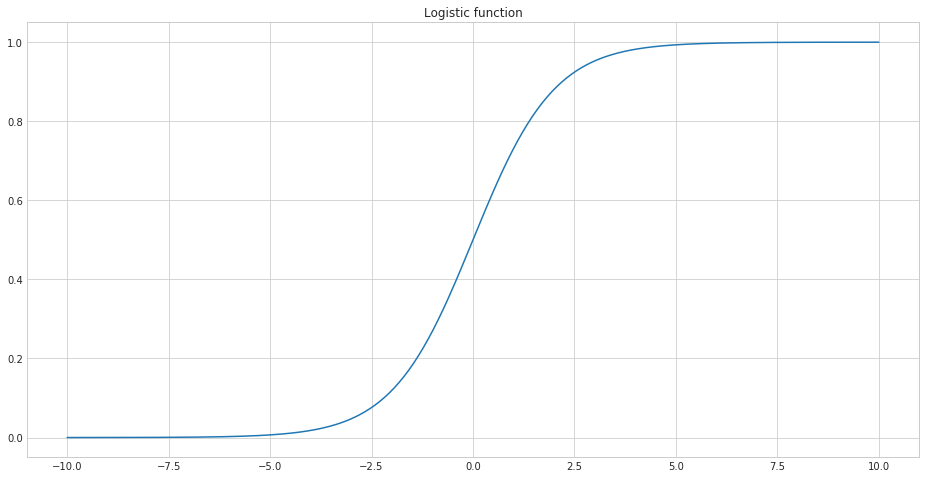

In [13]:
def logistic(t):
    return 1.0 / (1 + math.exp(-1.0 * t))

x = np.linspace(-10, 10, 500)
y = np.array([logistic(t) for t in x])

plt.plot(x, y)
plt.title('Logistic function')

In [14]:
 df = sm.datasets.fair.load_pandas().data

In [15]:
df.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [24]:
def affair_check(x):
    had_affair = 0
    if x > 0:
        had_affair = 1
    return had_affair

In [25]:
df['had_affair'] = df.affairs.apply(affair_check)

In [26]:
df.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [27]:
df.groupby(df.had_affair).mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


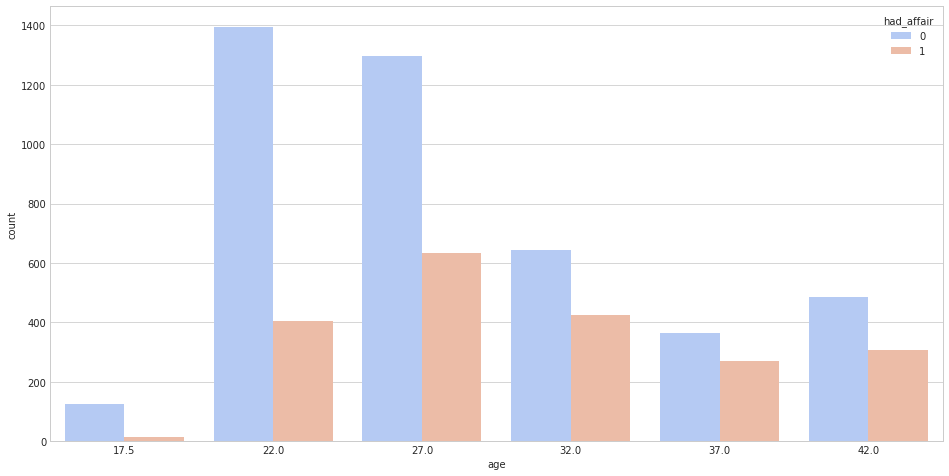

In [45]:
sns.countplot(x=df.age, hue=df.had_affair, palette='coolwarm')

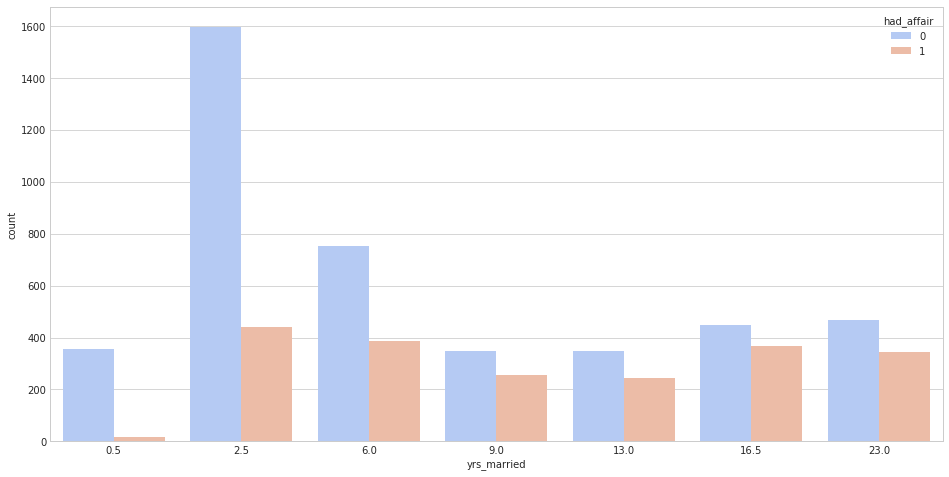

In [46]:
sns.countplot(x=df.yrs_married, hue=df.had_affair, palette='coolwarm')

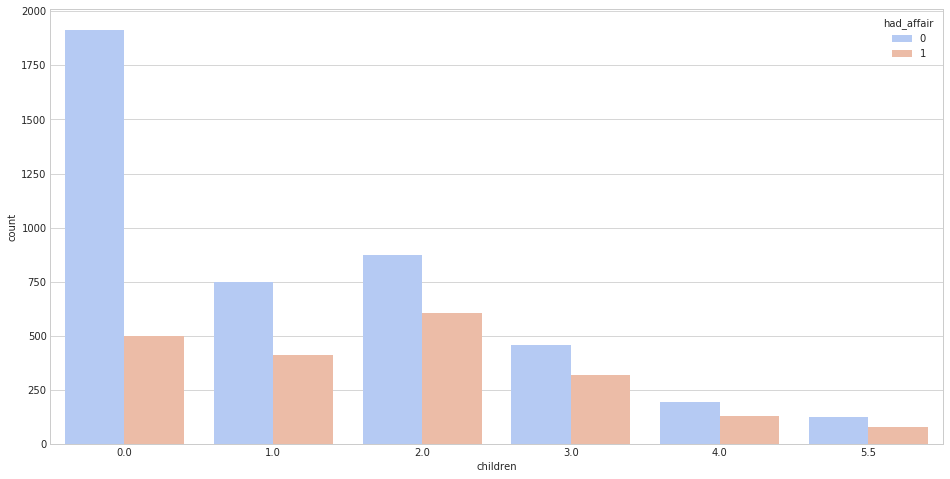

In [47]:
sns.countplot(x=df.children, hue=df.had_affair, palette='coolwarm')

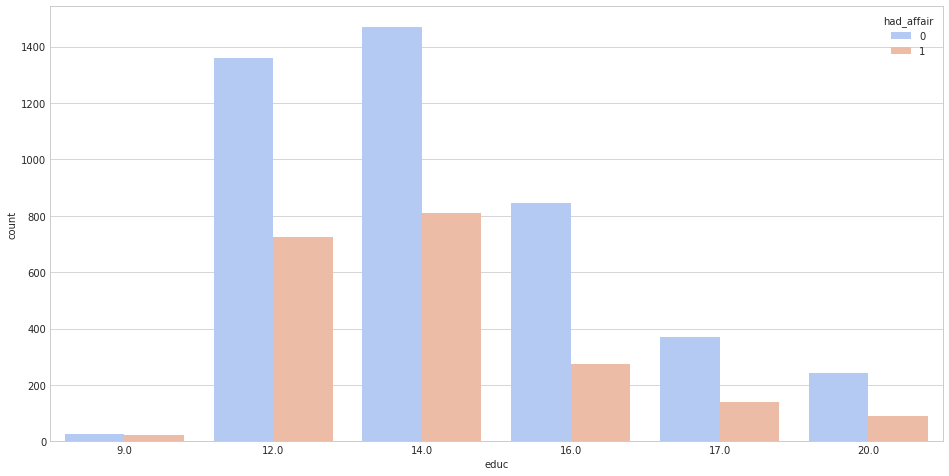

In [48]:
sns.countplot(x=df.educ, hue=df.had_affair, palette='coolwarm')

In [49]:
occ_dummies = pd.get_dummies(df.occupation)
hus_occ_dummies = pd.get_dummies(df.occupation_husb)

In [50]:
occ_dummies.head(20)

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0
6,0,0,0,0,1,0
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,1,0,0,0


In [52]:
occ_dummies.columns = [f'occ{i+1}' for i in range(len(occ_dummies.columns))]

In [53]:
occ_dummies.columns

Index(['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6'], dtype='object')

In [54]:
hus_occ_dummies.columns = [f'hoo{i+1}' for i in range(len(hus_occ_dummies.columns))]

In [59]:
X = df.drop(['occupation', 'occupation_husb', 'had_affair'], axis=1)

In [61]:
X.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,1.333333


In [62]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [63]:
X = pd.concat([X, dummies], axis=1)

In [64]:
X.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hoo1,hoo2,hoo3,hoo4,hoo5,hoo6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0
5,4.0,27.0,9.0,0.0,2.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0
6,5.0,37.0,23.0,5.5,2.0,12.0,0.852174,0,0,0,0,1,0,0,0,0,1,0,0
7,5.0,37.0,23.0,5.5,2.0,12.0,1.826086,0,1,0,0,0,0,0,0,1,0,0,0
8,3.0,22.0,2.5,0.0,2.0,12.0,4.799999,0,0,1,0,0,0,0,0,1,0,0,0
9,3.0,27.0,6.0,0.0,1.0,16.0,1.333333,0,0,1,0,0,0,0,0,0,0,1,0


In [65]:
y = df.had_affair
y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64